**Directed Graph**

In [4]:
# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):
        # allocate memory for the adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            # allocate node in adjacency list from src to dest
            self.adjList[src].append(dest)


# Function to print adjacency list representation of a graph
def printGraph(graph):
    for src in range(len(graph.adjList)):
        # print current vertex and all its neighboring vertices
        for dest in graph.adjList[src]:
            print(f"({src} —> {dest}) ", end="")
        print()


if __name__ == "__main__":

    # Input: Edges in a directed graph
    edges = [(0, 1), (1, 2), (2, 0), (2, 1), (3, 2), (4, 5), (5, 4)]

    # No. of vertices (labelled from 0 to 5)
    n = 6

    # construct a graph from a given list of edges
    graph = Graph(edges, n)

    # print adjacency list representation of the graph
    printGraph(graph)

(0 —> 1) 
(1 —> 2) 
(2 —> 0) (2 —> 1) 
(3 —> 2) 
(4 —> 5) 
(5 —> 4) 


**Weighted Directed Graph**

In [5]:
# A class to represent a graph object
class Graph:
    # Constructor to construct a graph
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [None] * n

        # allocate memory for the adjacency list
        for i in range(n):
            self.adjList[i] = []

        # add edges to the directed graph
        for src, dest, weight in edges:
            # allocate node in adjacency list from src to dest
            self.adjList[src].append((dest, weight))


# Function to print adjacency list representation of a graph
def printGraph(graph):
    for src in range(len(graph.adjList)):
        # print current vertex and all its neighboring vertices
        for dest, weight in graph.adjList[src]:
            print(f"({src} —> {dest}, {weight}) ", end="")
        print()


if __name__ == "__main__":

    # Input: Edges in a weighted digraph (as per the above diagram)
    # Edge (x, y, w) represents an edge from `x` to `y` having weight `w`
    edges = [
        (0, 1, 6),
        (1, 2, 7),
        (2, 0, 5),
        (2, 1, 4),
        (3, 2, 10),
        (4, 5, 1),
        (5, 4, 3),
    ]

    # No. of vertices (labelled from 0 to 5)
    n = 6

    # construct a graph from a given list of edges
    graph = Graph(edges, n)

    # print adjacency list representation of the graph
    printGraph(graph)

(0 —> 1, 6) 
(1 —> 2, 7) 
(2 —> 0, 5) (2 —> 1, 4) 
(3 —> 2, 10) 
(4 —> 5, 1) 
(5 —> 4, 3) 


**DFS**


*A graph can have more than one DFS traversal*

In [6]:
# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):
        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the undirected graph
        for src, dest in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)


# Function to perform DFS traversal on the graph on a graph
def DFS(graph, v, discovered):

    discovered[v] = True  # mark the current node as discovered
    print(v, end=" ")  # print the current node

    # do for every edge (v, u)
    for u in graph.adjList[v]:
        if not discovered[u]:  # if `u` is not yet discovered
            DFS(graph, u, discovered)


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        # Notice that node 0 is unconnected
        (1, 2),
        (1, 7),
        (1, 8),
        (2, 3),
        (2, 6),
        (3, 4),
        (3, 5),
        (8, 9),
        (8, 12),
        (9, 10),
        (9, 11),
    ]

    # total number of nodes in the graph (labelled from 0 to 12)
    n = 13

    # build a graph from the given edges
    graph = Graph(edges, n)

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # Perform DFS traversal from all undiscovered nodes to
    # cover all connected components of a graph
    for i in range(n):
        if not discovered[i]:
            DFS(graph, i, discovered)

0 1 2 3 4 5 6 7 8 9 10 11 12 

In [7]:
# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the undirected graph
        for src, dest in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)


# Perform iterative DFS on graph starting from vertex `v`
def iterativeDFS(graph, v, discovered):

    # create a stack used to do iterative DFS
    stack = []

    # push the source node into the stack
    stack.append(v)

    # loop till stack is empty
    while stack:

        # Pop a vertex from the stack
        v = stack.pop()

        # if the vertex is already discovered yet, ignore it
        if discovered[v]:
            continue

        # we will reach here if the popped vertex `v` is not discovered yet;
        # print `v` and process its undiscovered adjacent nodes into the stack
        discovered[v] = True
        print(v, end=" ")

        # do for every edge (v, u)
        adjList = graph.adjList[v]
        for i in reversed(range(len(adjList))):
            u = adjList[i]
            if not discovered[u]:
                stack.append(u)


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        # Notice that node 0 is unconnected
        (1, 2),
        (1, 7),
        (1, 8),
        (2, 3),
        (2, 6),
        (3, 4),
        (3, 5),
        (8, 9),
        (8, 12),
        (9, 10),
        (9, 11),
        # (6, 9) introduces a cycle
    ]

    # total number of nodes in the graph (labelled from 0 to 12)
    n = 13

    # build a graph from the given edges
    graph = Graph(edges, n)

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # Do iterative DFS traversal from all undiscovered nodes to
    # cover all connected components of a graph
    for i in range(n):
        if not discovered[i]:
            iterativeDFS(graph, i, discovered)

0 1 2 3 4 5 6 7 8 9 10 11 12 

the arrival time of a vertex is the time when it is first explored,


 and the departure time is when all of its neighbors have been explored and backtracking is ready to occur.

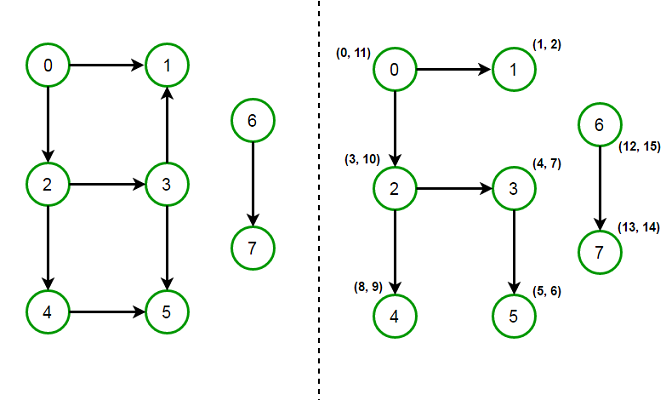

In [8]:
# A class to represent a graph object
class Graph:
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Function to perform DFS traversal on the graph on a graph
def DFS(graph, v, discovered, arrival, departure, time):

    # set the arrival time of vertex `v`
    arrival[v] = time
    time = time + 1

    # mark vertex as discovered
    discovered[v] = True

    for i in graph.adjList[v]:
        if not discovered[i]:
            time = DFS(graph, i, discovered, arrival, departure, time)

    # set departure time of vertex `v`
    departure[v] = time
    time = time + 1

    return time


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [(0, 1), (0, 2), (2, 3), (2, 4), (3, 1), (3, 5), (4, 5), (6, 7)]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # list to store the arrival time of vertex
    arrival = [None] * n

    # list to store the departure time of vertex
    departure = [None] * n

    # mark all the vertices as not discovered
    discovered = [False] * n
    time = 0

    # Perform DFS traversal from all undiscovered nodes to
    # cover all unconnected components of a graph
    for i in range(n):
        if not discovered[i]:
            time = DFS(graph, i, discovered, arrival, departure, time)

    # print arrival and departure time of each vertex in DFS
    for i in range(n):
        print(f"Vertex {i}", (arrival[i], departure[i]))

Vertex 0 (0, 11)
Vertex 1 (1, 2)
Vertex 2 (3, 10)
Vertex 3 (4, 7)
Vertex 4 (8, 9)
Vertex 5 (5, 6)
Vertex 6 (12, 15)
Vertex 7 (13, 14)


**TopologicalSort**

 directed graph

 possible if and only if the graph has no directed cycles, i.e. if the graph is DAG.

In [9]:
# A class to represent a graph object
class Graph:
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:

            # add an edge from source to destination
            self.adjList[src].append(dest)


# Perform DFS on the graph and set the departure time of all
# vertices of the graph
def DFS(graph, v, discovered, departure, time):

    # mark the current node as discovered
    discovered[v] = True

    # set the arrival time of vertex `v`
    time = time + 1

    # do for every edge (v, u)
    for u in graph.adjList[v]:
        # if `u` is not yet discovered
        if not discovered[u]:
            time = DFS(graph, u, discovered, departure, time)

    # ready to backtrack
    # set departure time of vertex `v`
    departure[time] = v
    time = time + 1

    return time


# Function to perform a topological sort on a given DAG
def doTopologicalSort(graph, n):

    # departure[] stores the vertex number using departure time as an index
    departure = [-1] * 2 * n

    """ If we had done it the other way around, i.e., fill the array
        with departure time using vertex number as an index, we would
        need to sort it later """

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n
    time = 0

    # perform DFS on all undiscovered vertices
    for i in range(n):
        if not discovered[i]:
            time = DFS(graph, i, discovered, departure, time)

    # Print the vertices in order of their decreasing
    # departure time in DFS, i.e., in topological order
    for i in reversed(range(2 * n)):
        if departure[i] != -1:
            print(departure[i], end=" ")


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [(0, 6), (1, 2), (1, 4), (1, 6), (3, 0), (3, 4), (5, 1), (7, 0), (7, 1)]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # perform topological sort
    doTopologicalSort(graph, n)

7 5 3 1 4 2 0 6 

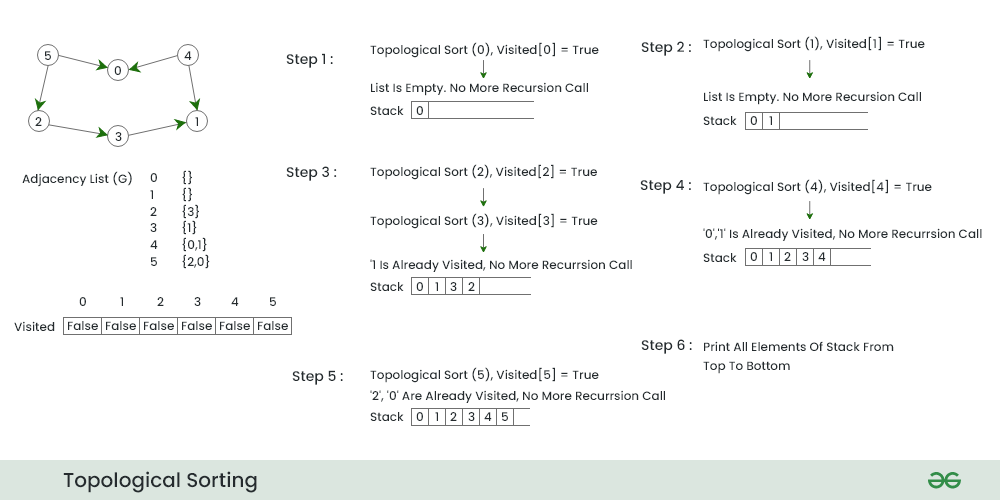

In [10]:
# A class to represent a graph object
class Graph:
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:

            # add an edge from source to destination
            self.adjList[src].append(dest)


def topologicalSortUtil(v, adj, visited, stack):
    # Mark the current node as visited
    visited[v] = True

    # Recur for all adjacent vertices
    for i in adj[v]:
        if not visited[i]:
            topologicalSortUtil(i, adj, visited, stack)

    # Push current vertex to stack which stores the result
    stack.append(v)


# List of graph edges as per the above diagram
edges = [(0, 6), (1, 2), (1, 4), (1, 6), (3, 0), (3, 4), (5, 1), (7, 0), (7, 1)]

# total number of nodes in the graph (labelled from 0 to 7)
n = 8

# build a graph from the given edges
graph = Graph(edges, n)
stack = []

visited = [False] * n

# Call the recursive helper function to store
# Topological Sort starting from all vertices one by
# one
for i in range(n):
    if not visited[i]:
        topologicalSortUtil(i, graph.adjList, visited, stack)
stack[::-1]

[7, 5, 3, 1, 4, 2, 0, 6]

**BFS**

In [11]:
from collections import defaultdict, deque


class Graph:
    def __init__(self, vertices):
        # Number of vertices
        self.V = vertices
        # Dictionary to store adjacency lists
        self.adj = defaultdict(list)

    def addEdge(self, u, v):
        # Function to add an edge to the graph
        self.adj[u].append(v)

    def topologicalSort(self):
        # Function to perform Topological Sort
        # Create a list to store in-degree of all vertices
        in_degree = [0] * self.V

        # Traverse adjacency lists to fill in_degree of vertices
        for i in range(self.V):
            for j in self.adj[i]:
                in_degree[j] += 1

        # Create a queue and enqueue all vertices with in-degree 0
        q = deque([])
        for i in range(self.V):
            if in_degree[i] == 0:
                q.append(i)

        # Initialize count of visited vertices
        count = 0

        # Create a list to store topological order
        top_order = []

        # One by one dequeue vertices from queue and enqueue
        # adjacent vertices if in-degree of adjacent becomes 0
        while q:
            # Extract front of queue (or perform dequeue)
            # and add it to topological order
            u = q.popleft()
            top_order.append(u)

            # Iterate through all its neighbouring nodes
            # of dequeued node u and decrease their in-degree
            # by 1
            for node in self.adj[u]:
                # If in-degree becomes zero, add it to queue
                in_degree[node] -= 1
                if in_degree[node] == 0:
                    q.append(node)

            count += 1

        # Check if there was a cycle
        if count != self.V:
            print("Graph contains cycle")
            return

        # Print topological order
        print("Topological Sort:", top_order)


# Driver code
if __name__ == "__main__":
    # Create a graph given in the above diagram
    g = Graph(6)
    g.addEdge(5, 2)
    g.addEdge(5, 0)
    g.addEdge(4, 0)
    g.addEdge(4, 1)
    g.addEdge(2, 3)
    g.addEdge(3, 1)

    print("Following is a Topological Sort of the given graph")
    g.topologicalSort()

Following is a Topological Sort of the given graph
Topological Sort: [4, 5, 2, 0, 3, 1]


Outgoing edges of a vertex are directed edges that the vertex is the origin.

Incoming edges of a vertex are directed edges that the vertex is the destination.

total = inc+out

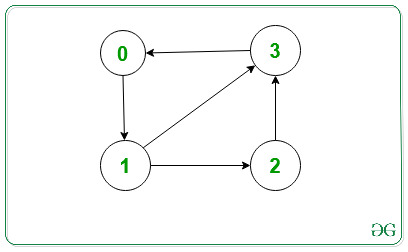

In [12]:
from collections import defaultdict

V = 4
edges = [(0, 1), {1, 2}, {1, 3}, (2, 3), (3, 0)]
indegree = defaultdict(int)
outdegree = defaultdict(int)
for trusts, trusted in edges:
    indegree[trusted] += 1
    outdegree[trusts] += 1

In [13]:
indegree

defaultdict(int, {1: 1, 2: 1, 3: 2, 0: 1})

In [14]:
outdegree

defaultdict(int, {0: 1, 1: 2, 2: 1, 3: 1})

In [15]:
# Idea 2 convert to adj list
adj = [[] for _ in range(V)]
for src, dst in edges:
    adj[src].append(dst)
adj

[[1], [2, 3], [3], [0]]

In [16]:
_in = [0] * V
out = [0] * V

for i in range(0, len(adj)):

    List = adj[i]

    # Out degree for ith vertex will be the count
    # of direct paths from i to other vertices
    out[i] = len(List)
    for j in adj[i]:  # range(0, len(List)):

        # Every vertex that has
        # an incoming edge from i
        _in[j] += 1
print(_in)
print(out)

[1, 1, 1, 2]
[1, 2, 1, 1]


Check if a graph is strongly connected or not

Given a directed graph, check if it is strongly connected or not. 

A directed graph is said to be strongly connected if every vertex is reachable from every other vertex

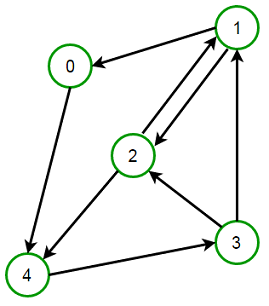

In [17]:
# A class to represent a graph object
class Graph:

    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Function to perform DFS traversal on the graph on a graph
def DFS(graph, v, visited):

    # mark current node as visited
    visited[v] = True

    # do for every edge (v, u)
    for u in graph.adjList[v]:
        # `u` is not visited
        if not visited[u]:
            DFS(graph, u, visited)


# Check if the graph is strongly connected or not
def isStronglyConnected(graph, n):

    # do for every vertex
    for i in range(n):

        # to keep track of whether a vertex is visited or not
        visited = [False] * n

        # start DFS from the first vertex
        DFS(graph, i, visited)

        # If DFS traversal doesn't visit all vertices,
        # then the graph is not strongly connected
        for b in visited:
            if not b:
                return False

    return True


# (n*(n+m))
if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [(0, 4), (1, 0), (1, 2), (2, 1), (2, 4), (3, 1), (3, 2), (4, 3)]

    # total number of nodes in the graph
    n = 5

    # construct graph
    graph = Graph(edges, n)

    # check if the graph is not strongly connected or not
    if isStronglyConnected(graph, n):
        print("The graph is strongly connected")
    else:
        print("The graph is not strongly connected")

The graph is strongly connected


In [18]:
# A class to represent a graph object
class Graph:
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Function to perform DFS traversal on the graph on a graph
def DFS(graph, v, visited):

    # mark current node as visited
    visited[v] = True

    # do for every edge (v, u)
    for u in graph.adjList[v]:
        # `u` is not visited
        if not visited[u]:
            DFS(graph, u, visited)


# Function to check if the graph is strongly connected or not
def isStronglyConnected(graph, n):

    # to keep track of whether a vertex is visited or not
    visited = [False] * n

    # choose a random starting point
    v = 0

    # run a DFS starting at `v`
    DFS(graph, v, visited)

    # If DFS traversal doesn't visit all vertices,
    # then the graph is not strongly connected
    for b in visited:
        if not b:
            return False

    # reset visited list
    visited = [False] * n

    # Reverse the direction of all edges in the
    # directed graph
    edges = [(j, i) for i in range(n) for j in graph.adjList[i]]

    # Create a graph from reversed edges
    gr = Graph(edges, n)

    # Again run a DFS starting at `v`
    DFS(gr, v, visited)

    # If DFS traversal doesn't visit all vertices,
    # then the graph is not strongly connected
    for b in visited:
        if not b:
            return False

    # if the graph "passes" both DFSs, it is strongly connected
    return True


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [(0, 4), (1, 0), (1, 2), (2, 1), (2, 4), (3, 1), (3, 2), (4, 3)]

    # total number of nodes in the graph
    n = 5

    # construct graph
    graph = Graph(edges, n)

    # check if the graph is not strongly connected or not
    if isStronglyConnected(graph, n):
        print("The graph is strongly connected")
    else:
        print("The graph is not strongly connected")

The graph is strongly connected


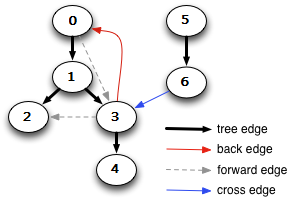

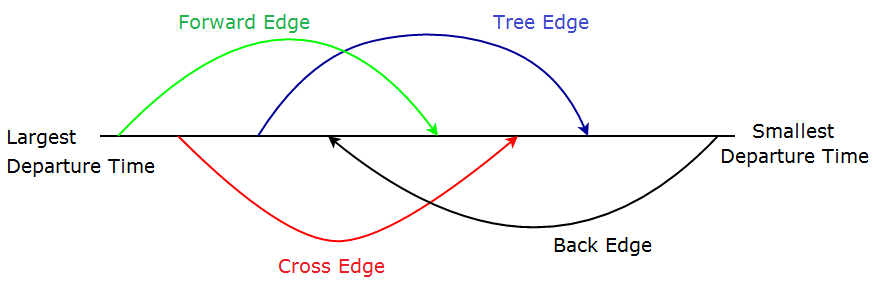

Tree edge:

arrival[u] < arrival[v]

departure[u] > departure[v]

Back edge:

arrival[u] > arrival[v]

departure[u] < departure[v]

Forward edge:

arrival[u] < arrival[v]

departure[u] > departure[v]

Cross edge:
. For any cross edge, u is neither an ancestor nor descendant of v, So we can say that u and v intervals does not overlap,


arrival[u] > arrival[v]

departure[u] > departure[v]

Given a directed graph, check if it is a DAG (Directed Acyclic Graph) or not. A DAG is a digraph (directed graph) that contains no cycles.

not passing on GFG

In [19]:
# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Perform DFS on the graph and set the departure time of all vertices of the graph
def DFS(graph, v, discovered, departure, time):

    # mark the current node as discovered
    time = time + 1
    discovered[v] = True

    # do for every edge (v, u)
    for u in graph.adjList[v]:
        # if `u` is not yet discovered
        if not discovered[u]:
            time = DFS(graph, u, discovered, departure, time)

    # ready to backtrack
    # set departure time of vertex `v`
    departure[v] = time
    time = time + 1

    return time


# Returns true if the given directed graph is DAG
def isDAG(graph, n):

    # keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # keep track of the departure time of a vertex in DFS
    departure = [None] * n

    time = -1

    # Perform DFS traversal from all undiscovered vertices
    # to visit all connected components of a graph
    for i in range(n):
        if not discovered[i]:
            time = DFS(graph, i, discovered, departure, time)

    # check if the given directed graph is DAG or not
    for u in range(n):

        # check if (u, v) forms a back-edge.
        for v in graph.adjList[u]:

            # If the departure time of vertex `v` is greater than equal
            # to the departure time of `u`, they form a back edge.

            # Note that `departure[u]` will be equal to `departure[v]`
            # only if `u = v`, i.e., vertex contain an edge to itself
            if departure[u] <= departure[v]:
                return False

    # no back edges
    return True


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [(0, 1), (0, 3), (1, 2), (1, 3), (3, 2), (3, 4), (3, 0), (5, 6), (6, 3)]

    # total number of nodes in the graph (labelled from 0 to 6)
    n = 7

    # build a graph from the given edges
    graph = Graph(edges, n)

    # check if the given directed graph is DAG or not
    if isDAG(graph, n):
        print("The graph is a DAG")
    else:
        print("The graph is not a DAG")

The graph is not a DAG


**Given a connected undirected graph, check if it contains any cycle or not.**

In [12]:
from collections import deque


# A class to represent a graph object
class Graph:

    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the undirected graph
        for src, dest in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)


# Perform BFS on the graph starting from vertex `src` and
# return true if a cycle is found in the graph
def BFS(graph, src, n):

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # mark the source vertex as discovered
    discovered[src] = True

    # create a queue for doing BFS
    q = deque()

    # enqueue source vertex and its parent info
    q.append((src, -1))

    # loop till queue is empty
    while q:

        # dequeue front node and print it
        (v, parent) = q.popleft()

        # do for every edge (v, u)
        for u in graph.adjList[v]:
            if not discovered[u]:
                # mark it as discovered
                discovered[u] = True

                # construct the queue node containing info
                # about vertex and enqueue it
                q.append((u, v))

            # `u` is discovered, and `u` is not a parent
            elif u != parent:
                # we found a cross-edge, i.e., the cycle is found
                return True

    # no cross-edges were found in the graph
    return False


if __name__ == "__main__":

    # List of graph edges
    edges = [
        (0, 1),
        (0, 2),
        (0, 3),
        (1, 4),
        (1, 5),
        (4, 8),
        (4, 9),
        (3, 6),
        (3, 7),
        (6, 10),
        (6, 11),
        (5, 9),
        # edge (5, 9) introduces a cycle in the graph
    ]

    # total number of nodes in the graph (0 to 11)
    n = 12

    # build a graph from the given edges
    graph = Graph(edges, n)

    # Perform BFS traversal in connected components of a graph
    if BFS(graph, 0, n):
        print("The graph contains a cycle")
    else:
        print("The graph doesn't contain any cycle")

The graph contains a cycle


In [6]:
INF = float("inf")
graph = [[0, 5, INF, 10], [INF, 0, 3, INF], [INF, INF, 0, 1], [INF, INF, INF, 0]]

In [10]:
edges = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 4),
    (1, 5),
    (4, 8),
    (4, 9),
    (3, 6),
    (3, 7),
    (6, 10),
    (6, 11),
    (5, 9),
    # edge (5, 9) introduces a cycle in the graph
]

**BellMan Ford**

Input: Graph and a source vertex src 

Output: Shortest distance to all vertices from src.

 If there is a negative weight cycle, then shortest distances are not calculated, negative weight cycle is reported.

Time Complexity when graph is connected: 

Best Case: O(E), when distance array after 1st and 2nd relaxation are same , we can simply stop further processing

Average Case: O(V*E)

Worst Case: O(V*E)

Time Complexity when graph is disconnected:

All the cases: O(E*(V^2))

Auxiliary Space: O(V), where V is the number of vertices in the graph.

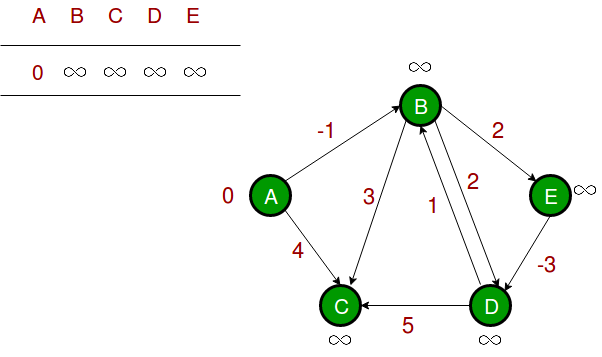

nitialize all distances as infinite, except the distance to source itself. 


Total number of vertices in the graph is 5, so all edges must be processed 4 times.

In [21]:
import sys


# Recursive function to print the path of a given vertex from source vertex
def getPath(parent, vertex):
    if vertex < 0:
        return []
    return getPath(parent, parent[vertex]) + [vertex]


def get_path(parent, vertex):
    path = []
    while vertex != -1:
        path.append(vertex)
        vertex = parent[vertex]
    return path[::-1]


# Function to run the Bellman–Ford algorithm from a given source
def bellmanFord(edges, source, n):
    # distance[] and parent[] stores the shortest path (least cost/path) info
    distance = [sys.maxsize] * n
    parent = [-1] * n

    # Initially, all vertices except source vertex weight INFINITY and no parent
    distance[source] = 0

    # relaxation step (run V-1 times)
    for k in range(n - 1):
        # edge from `u` to `v` having weight `w`
        for u, v, w in edges:
            # if the distance to destination `v` can be shortened by taking edge (u, v)
            if distance[u] != sys.maxsize and distance[u] + w < distance[v]:
                # update distance to the new lower value
                distance[v] = distance[u] + w
                # set v's parent as `u`
                parent[v] = u

    # run relaxation step once more for n'th time to check for negative-weight cycles
    for u, v, w in edges:  # edge from `u` to `v` having weight `w`
        # if the distance to destination `u` can be shortened by taking edge (u, v)
        if distance[u] != sys.maxsize and distance[u] + w < distance[v]:
            print("Negative-weight cycle is found!!")
            return

    for i in range(n):
        if i != source and distance[i] < sys.maxsize:
            print(
                f"The distance of vertex {i} from vertex {source} is {distance[i]}. "
                f"Its path is",
                get_path(parent, i),  # getPath(parent, i),
            )
            # print()


if __name__ == "__main__":

    # of graph edges as per the above diagram
    edges = [
        # (x, y, w) —> edge from `x` to `y` having weight `w`
        (0, 1, -1),
        (0, 2, 4),
        (1, 2, 3),
        (1, 3, 2),
        (1, 4, 2),
        (3, 2, 5),
        (3, 1, 1),
        (4, 3, -3),
    ]

    # set the maximum number of nodes in the graph
    n = 5

    # run the Bellman–Ford algorithm from every node
    for source in range(n):
        bellmanFord(edges, source, n)

The distance of vertex 1 from vertex 0 is -1. Its path is [0, 1]
The distance of vertex 2 from vertex 0 is 2. Its path is [0, 1, 2]
The distance of vertex 3 from vertex 0 is -2. Its path is [0, 1, 4, 3]
The distance of vertex 4 from vertex 0 is 1. Its path is [0, 1, 4]
The distance of vertex 2 from vertex 1 is 3. Its path is [1, 2]
The distance of vertex 3 from vertex 1 is -1. Its path is [1, 4, 3]
The distance of vertex 4 from vertex 1 is 2. Its path is [1, 4]
The distance of vertex 1 from vertex 3 is 1. Its path is [3, 1]
The distance of vertex 2 from vertex 3 is 4. Its path is [3, 1, 2]
The distance of vertex 4 from vertex 3 is 3. Its path is [3, 1, 4]
The distance of vertex 1 from vertex 4 is -2. Its path is [4, 3, 1]
The distance of vertex 2 from vertex 4 is 1. Its path is [4, 3, 1, 2]
The distance of vertex 3 from vertex 4 is -3. Its path is [4, 3]


In [17]:
edges = [
    # (x, y, w) —> edge from `x` to `y` having weight `w`
    (0, 1, -1),
    (0, 2, 4),
    (1, 2, 3),
    (1, 3, 2),
    (1, 4, 2),
    (3, 2, 5),
    (3, 1, 1),
    (4, 3, -3),
]

In [18]:
adj = [[] for _ in range(5)]
for u, v, w in edges:
    adj[u].append((v, w))
adj

[[(1, -1), (2, 4)], [(2, 3), (3, 2), (4, 2)], [], [(2, 5), (1, 1)], [(3, -3)]]

In [20]:
adj_matrix = [["inf" for i in range(5)] for j in range(5)]
for u, v, w in edges:
    adj_matrix[u][v] = w
    adj_matrix[u][u] = 0
    adj_matrix[v][v] = 0
adj_matrix

[[0, -1, 4, 'inf', 'inf'],
 ['inf', 0, 3, 2, 2],
 ['inf', 'inf', 0, 'inf', 'inf'],
 ['inf', 1, 5, 0, 'inf'],
 ['inf', 'inf', 'inf', -3, 0]]

**Dijkstra’s Algorithm**

Only for postive  weights

O(E.log(V))

Bellman–Ford algorithm is slower than Dijkstra’s Algorithm, but it can handle negative weights edges in the graph, unlike Dijkstra’s.

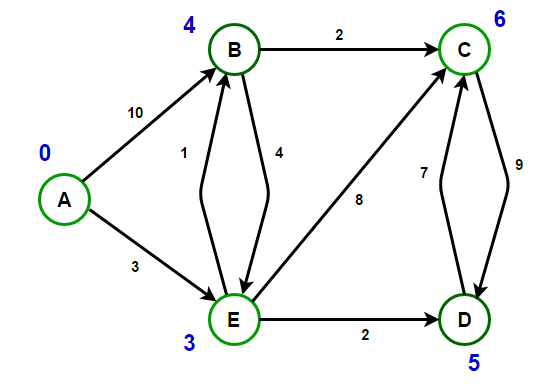

In [54]:
import sys
from heapq import heappop, heappush


# A class to store a heap node
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight

    # Override the __lt__() function to make `Node` class work with a min-heap
    def __lt__(self, other):
        return self.weight < other.weight


# A class to represent a graph object
class Graph:
    def __init__(self, edges, n):
        # allocate memory for the adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for source, dest, weight in edges:
            self.adjList[source].append((dest, weight))


def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)


def get_path(parent, vertex, path):
    while vertex != -1:
        path.append(vertex)
        vertex = parent[vertex]
    return path[::-1]


# Run Dijkstra’s algorithm on a given graph
def findShortestPaths(graph, source, n):

    # create a min-heap and push source node having distance 0
    pq = []
    heappush(pq, Node(source, weight=0))

    # set initial distance from the source to `v` as infinity
    dist = [sys.maxsize] * n

    # distance from the source to itself is zero
    dist[source] = 0

    # list to track vertices for which minimum cost is already found
    done = [False] * n
    done[source] = True

    # stores predecessor of a vertex (to a print path)
    prev = [-1] * n

    # run till min-heap is empty
    while pq:

        node = heappop(pq)  # Remove and return the best vertex
        u = node.vertex  # get the vertex number

        # do for each neighbor `v` of `u`
        for v, weight in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:  # Relaxation step
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))

        # mark vertex `u` as done so it will not get picked up again
        done[u] = True

    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f"Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}")
            route.clear()


if __name__ == "__main__":

    # initialize edges as per the above diagram
    # (u, v, w) represent edge from vertex `u` to vertex `v` having weight `w`
    edges = [
        (0, 1, 10),
        (0, 4, 3),
        (1, 2, 2),
        (1, 4, 4),
        (2, 3, 9),
        (3, 2, 7),
        (4, 1, 1),
        (4, 2, 8),
        (4, 3, 2),
    ]
    # O(E.log(V))
    # total number of nodes in the graph (labelled from 0 to 4)
    n = 5

    # construct graph
    graph = Graph(edges, n)

    # run the Dijkstra’s algorithm from every node
    for source in range(n):
        findShortestPaths(graph, source, n)

Path (0 —> 1): Minimum cost = 4, Route = [0, 4, 1]
Path (0 —> 2): Minimum cost = 6, Route = [0, 4, 1, 2]
Path (0 —> 3): Minimum cost = 5, Route = [0, 4, 3]
Path (0 —> 4): Minimum cost = 3, Route = [0, 4]
Path (1 —> 2): Minimum cost = 2, Route = [1, 2]
Path (1 —> 3): Minimum cost = 6, Route = [1, 4, 3]
Path (1 —> 4): Minimum cost = 4, Route = [1, 4]
Path (2 —> 3): Minimum cost = 9, Route = [2, 3]
Path (3 —> 2): Minimum cost = 7, Route = [3, 2]
Path (4 —> 1): Minimum cost = 1, Route = [4, 1]
Path (4 —> 2): Minimum cost = 3, Route = [4, 1, 2]
Path (4 —> 3): Minimum cost = 2, Route = [4, 3]


Find the cost of the shortest path in DAG using one pass of Bellman–Ford

Graph have no cycles

Given a weighted directed acyclic graph (DAG) and a source vertex, find the shortest path’s cost from the source vertex to all other vertices present 

in the graph. If the vertex can’t be reached from the given source vertex, return its distance as infinity.

In [23]:
import sys


# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for source, dest, weight in edges:
            self.adjList[source].append((dest, weight))


# Perform DFS on the graph and set the departure time of all vertices of the graph
def DFS(graph, v, discovered, departure, time):

    # mark the current node as discovered
    discovered[v] = True

    # set arrival time – not needed
    # time = time + 1

    # do for every edge (v, u)
    for u, w in graph.adjList[v]:
        # if `u` is not yet discovered
        if not discovered[u]:
            time = DFS(graph, u, discovered, departure, time)

    # ready to backtrack
    # set departure time of vertex `v`
    departure[time] = v

    time = time + 1
    return time


# The function performs the topological sort on a given DAG and then finds
# the longest distance of all vertices from the given source by running one pass
# of the Bellman–Ford algorithm on edges of vertices in topological order
def findShortestDistance(graph, source, n):

    # `departure` stores the vertex number using departure time as an index
    departure = [-1] * n

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n
    time = 0

    # perform DFS on all undiscovered vertices
    for i in range(n):
        if not discovered[i]:
            time = DFS(graph, i, discovered, departure, time)

    cost = [sys.maxsize] * n
    cost[source] = 0

    # Process the vertices in topological order, i.e., in order
    # of their decreasing departure time in DFS
    for i in reversed(range(n)):

        # for each vertex in topological order, relax the cost of its adjacent vertices
        v = departure[i]

        # edge from `v` to `u` having weight `w`
        for u, w in graph.adjList[v]:
            # if the distance to destination `u` can be shortened by
            # taking edge (v, u), update cost to the new lower value
            if cost[v] != sys.maxsize and cost[v] + w < cost[u]:
                cost[u] = cost[v] + w

    # print shortest paths
    for i in range(n):
        print(f"dist({source}, {i}) = {cost[i]}")


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6, 2),
        (1, 2, -4),
        (1, 4, 1),
        (1, 6, 8),
        (3, 0, 3),
        (3, 4, 5),
        (5, 1, 2),
        (7, 0, 6),
        (7, 1, -1),
        (7, 3, 4),
        (7, 5, -4),
    ]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # source vertex
    source = 7

    # find the shortest distance of all vertices from the given source
    findShortestDistance(graph, source, n)

dist(7, 0) = 6
dist(7, 1) = -2
dist(7, 2) = -6
dist(7, 3) = 4
dist(7, 4) = -1
dist(7, 5) = -4
dist(7, 6) = 6
dist(7, 7) = 0


In [24]:
import sys


# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for source, dest, weight in edges:
            self.adjList[source].append((dest, weight))


# Perform DFS on the graph and set the departure time of all
# vertices of the graph
def DFS(graph, v, discovered, departure, time):

    # mark the current node as discovered
    discovered[v] = True

    # set arrival time – not needed
    # time = time + 1

    # do for every edge (v, u)
    for u, w in graph.adjList[v]:
        # if `u` is not yet discovered
        if not discovered[u]:
            time = DFS(graph, u, discovered, departure, time)

    # ready to backtrack
    # set departure time of vertex `v`
    departure[time] = v
    time = time + 1

    return time


# The function performs the topological sort on a given DAG and then finds
# the longest distance of all vertices from a given source by running
# one pass of the Bellman–Ford algorithm
def findLongestDistance(graph, source, n):

    # `departure` stores vertex number having its departure
    # time equal to the index of it
    departure = [-1] * n

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n
    time = 0

    # perform DFS on all undiscovered vertices
    for i in range(n):
        if not discovered[i]:
            time = DFS(graph, i, discovered, departure, time)

    cost = [sys.maxsize] * n
    cost[source] = 0

    # Process the vertices in topological order, i.e., in order
    # of their decreasing departure time in DFS
    for i in reversed(range(n)):

        # for each vertex in topological order,
        # relax the cost of its adjacent vertices
        v = departure[i]

        # edge from `v` to `u` having weight `w`
        for u, w in graph.adjList[v]:
            w = -w  # make edge weight negative

            # if the distance to destination `u` can be shortened by
            # taking edge (v, u), then update cost to the new lower value
            if cost[v] != sys.maxsize and cost[v] + w < cost[u]:
                cost[u] = cost[v] + w

    # print the longest paths
    for i in range(n):
        print(f"dist ({source}, {i}) = {-cost[i]}")


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6, 2),
        (1, 2, -4),
        (1, 4, 1),
        (1, 6, 8),
        (3, 0, 3),
        (3, 4, 5),
        (5, 1, 2),
        (7, 0, 6),
        (7, 1, -1),
        (7, 3, 4),
        (7, 5, -4),
    ]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # source vertex
    source = 7
    # O(V+E)
    # find the longest distance of all vertices from a given source
    findLongestDistance(graph, source, n)

dist (7, 0) = 7
dist (7, 1) = -1
dist (7, 2) = -5
dist (7, 3) = 4
dist (7, 4) = 9
dist (7, 5) = -4
dist (7, 6) = 9
dist (7, 7) = 0


**BFS**

In [25]:
from collections import deque


# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the undirected graph
        for src, dest in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)


# Perform BFS on the graph starting from vertex `v`
def BFS(graph, v, discovered):

    # create a queue for doing BFS
    q = deque()

    # mark the source vertex as discovered
    discovered[v] = True

    # enqueue source vertex
    q.append(v)

    # loop till queue is empty
    while q:

        # dequeue front node and print it
        v = q.popleft()
        print(v, end=" ")

        # do for every edge (v, u)
        for u in graph.adjList[v]:
            if not discovered[u]:
                # mark it as discovered and enqueue it
                discovered[u] = True
                q.append(u)


def bfsOfGraph(V: int, adj):
    # it will not show the nodes in output if there is  no node connected to it.
    q = deque()
    q.append(0)  # root 0
    visited = [False] * V  # Initialize all nodes as not visited
    visited[0] = True
    bfs_traversal = []

    while q:
        current_node = q.popleft()
        bfs_traversal.append(current_node)  # Append current node to traversal path

        for neighbour in adj[current_node]:
            if not visited[neighbour]:
                visited[neighbour] = True
                q.append(neighbour)

    return bfs_traversal


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (1, 2),
        (1, 3),
        (1, 4),
        (2, 5),
        (2, 6),
        (5, 9),
        (5, 10),
        (4, 7),
        (4, 8),
        (7, 11),
        (7, 12),
        # vertex 0, 13, and 14 are single nodes
    ]

    # # total number of nodes in the graph (labelled from 0 to 14)
    n = 15

    # build a graph from the given edges
    graph = Graph(edges, n)

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # Perform BFS traversal from all undiscovered nodes to
    # cover all connected components of a graph
    for i in range(n):
        if not discovered[i]:
            # start BFS traversal from vertex i
            BFS(graph, i, discovered)
    print()
    print(bfsOfGraph(n, graph.adjList))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
[0]


unweighted, undirected graph of V nodes and E edges, a source node S, and a destination node D,

 we need to find the shortest path from node S to node D in the graph.

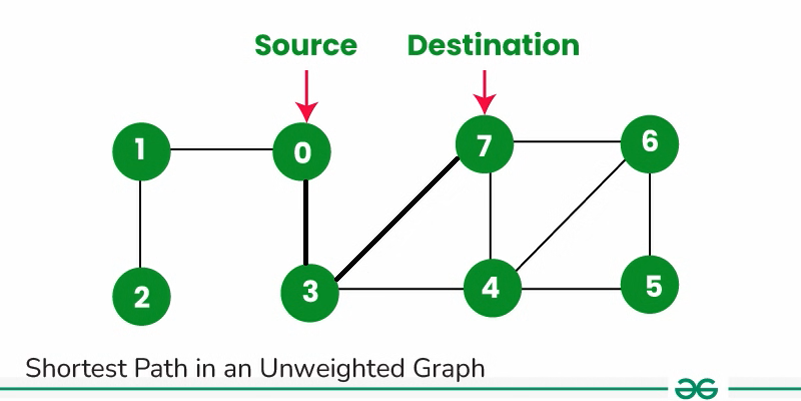

In [26]:
from collections import deque


def bfs(graph, S, par, dist):
    # Queue to store the nodes in the order they are visited
    q = deque()
    # Mark the distance of the source node as 0
    dist[S] = 0
    # Push the source node to the queue
    q.append(S)

    # Iterate until the queue is not empty
    while q:
        # Pop the node at the front of the queue
        node = q.popleft()

        # Explore all the neighbors of the current node
        for neighbor in graph[node]:
            # Check if the neighboring node is not visited
            if dist[neighbor] == float("inf"):
                # Mark the current node as the parent of the neighboring node
                par[neighbor] = node
                # Mark the distance of the neighboring node as the distance of the current node + 1
                dist[neighbor] = dist[node] + 1
                # Insert the neighboring node to the queue
                q.append(neighbor)


def print_shortest_distance(graph, S, D, V):
    # par[] array stores the parent of nodes
    par = [-1] * V

    # dist[] array stores the distance of nodes from S
    dist = [float("inf")] * V

    # Function call to find the distance of all nodes and their parent nodes
    bfs(graph, S, par, dist)

    if dist[D] == float("inf"):
        print("Source and Destination are not connected")
        return

    # List path stores the shortest path
    path = []
    current_node = D
    path.append(D)
    while par[current_node] != -1:
        path.append(par[current_node])
        current_node = par[current_node]

    # Printing path from source to destination
    for i in range(len(path) - 1, -1, -1):
        print(path[i], end=" ")


# Driver program to test above functions
if __name__ == "__main__":
    # no. of vertices
    V = 8
    # Source and Destination vertex
    S, D = 2, 6
    # Edge list
    edges = [
        [0, 1],
        [1, 2],
        [0, 3],
        [3, 4],
        [4, 7],
        [3, 7],
        [6, 7],
        [4, 5],
        [4, 6],
        [5, 6],
    ]

    # List to store the graph as an adjacency list
    graph = [[] for _ in range(V)]

    for edge in edges:
        graph[edge[0]].append(edge[1])
        graph[edge[1]].append(edge[0])

    print_shortest_distance(graph, S, D, V)

2 1 0 3 4 6 

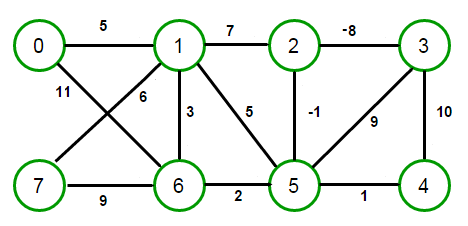

find the maximum cost path from a given source to any other vertex in the graph

 which is greater than a given cost.

In [27]:
import sys
from collections import deque


# A class to represent a graph object
class Graph:
    # Graph Constructor
    def __init__(self, edges, n):

        # resize the list to `n` elements
        self.adjList = [[] for _ in range(n)]

        # add edges to the undirected graph
        for src, dest, weight in edges:
            self.adjList[src].append((dest, weight))
            self.adjList[dest].append((src, weight))


# Perform BFS on graph `graph` starting from vertex `v`
def findMaxCost(graph, src, k):

    # create a queue for doing BFS
    q = deque()

    # add source vertex to set and enqueue it
    vertices = set([src])

    # (current vertex, current path cost, set of nodes visited so far in
    # the current path)
    q.append((src, 0, vertices))

    # stores maximum cost of a path from the source
    maxcost = -sys.maxsize

    # loop till queue is empty
    while q:

        # dequeue front node
        v, cost, vertices = q.popleft()

        # if the destination is reached and BFS depth is equal to `m`,
        # update the minimum cost calculated so far
        if cost > k:
            maxcost = max(maxcost, cost)

        # do for every adjacent edge of `v`
        for dest, weight in graph.adjList[v]:

            # check for a cycle
            if not dest in vertices:

                # add current node to the path
                s = set(vertices)
                s.add(dest)

                # push every vertex (discovered or undiscovered) into
                # the queue with a cost equal to the
                # parent's cost plus the current edge's weight
                q.append((dest, cost + weight, s))

    # return max-cost
    return maxcost


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6, 11),
        (0, 1, 5),
        (1, 6, 3),
        (1, 5, 5),
        (1, 2, 7),
        (2, 3, -8),
        (3, 4, 10),
        (5, 2, -1),
        (5, 3, 9),
        (5, 4, 1),
        (6, 5, 2),
        (7, 6, 9),
        (7, 1, 6),
    ]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    src = 0
    cost = 50

    # Start modified BFS traversal from source vertex `src`
    max_cost = findMaxCost(graph, src, cost)

    if max_cost != -sys.maxsize:
        print(max_cost)
    else:
        print(f"All paths from source have their costs < {cost}")

51


Given a digraph (directed graph), find the total number of routes to reach the destination from a given source with exactly m edges.

In [28]:
from collections import deque


# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Perform BFS on graph `graph` starting from vertex `v`
def findTotalPaths(graph, src, dest, m):

    # create a queue for doing BFS
    q = deque()

    # enqueue current vertex and the current depth of BFS
    # (how far away the current node is from the source)
    q.append((src, 0))

    # stores number of paths from source to destination having exactly `m` edges
    count = 0

    # loop till queue is empty
    while q:

        # dequeue front node
        vertex, depth = q.popleft()

        # if the destination is reached and BFS depth is equal to `m`, update count
        if vertex == dest and depth == m:
            count = count + 1

        # don't consider nodes having a BFS depth more than `m`.
        # This check will result in optimized code and handle cycles
        # in the graph (otherwise, the loop will never break)
        if depth > m:
            break

        # do for every adjacent vertex `u` of `v`
        for u in graph.adjList[vertex]:
            # enqueue every vertex (discovered or undiscovered)
            q.append((u, depth + 1))

    # return number of paths from source to destination
    return count


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6),
        (0, 1),
        (1, 6),
        (1, 5),
        (1, 2),
        (2, 3),
        (3, 4),
        (5, 2),
        (5, 3),
        (5, 4),
        (6, 5),
        (7, 6),
        (7, 1),
    ]

    # total number of nodes in the graph
    n = 8

    # construct graph
    graph = Graph(edges, n)

    src, dest = 0, 3
    m = 4

    # Do modified BFS traversal from the source vertex src
    print(findTotalPaths(graph, src, dest, m))

3


Given a weighted digraph (directed graph), find the least-cost path from a given source to a given destination with exactly m edges.

In [29]:
import sys
from collections import deque


# A class to represent a graph object
class Graph:
    # Graph Constructor
    def __init__(self, edges, n):

        # resize the list to `n` elements
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest, weight in edges:
            self.adjList[src].append((dest, weight))


# Perform BFS on graph `g` starting from vertex `v`
def findLeastCost(g, src, dest, m):

    # create a queue for doing BFS
    q = deque()

    # enqueue source vertex
    q.append((src, 0, 0))

    # stores least-cost from source to destination
    minCost = sys.maxsize

    # loop till queue is empty
    while q:

        # dequeue front node
        v, depth, cost = q.popleft()

        # if the destination is reached and BFS depth is equal to `m`,
        # update the minimum cost calculated so far
        if v == dest and depth == m:
            minCost = min(minCost, cost)

        # don't consider nodes having a BFS depth more than `m`.
        # This check will result in optimized code and handle cycles
        # in the graph (otherwise, the loop will never break)
        if depth > m:
            break

        # do for every adjacent edge of `v`
        for des, weight in g.adjList[v]:
            # push every vertex (discovered or undiscovered) into
            # the queue with depth as +1 of parent and cost equal
            # to the cost of parent plus the current edge weight
            q.append((des, depth + 1, cost + weight))

    # return least-cost
    return minCost


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6, -1),
        (0, 1, 5),
        (1, 6, 3),
        (1, 5, 5),
        (1, 2, 7),
        (2, 3, 8),
        (3, 4, 10),
        (5, 2, -1),
        (5, 3, 9),
        (5, 4, 1),
        (6, 5, 2),
        (7, 6, 9),
        (7, 1, 6),
    ]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    g = Graph(edges, n)

    (src, dest) = (0, 3)
    m = 4

    # Perform modified BFS traversal from source vertex `src`
    print(findLeastCost(g, src, dest, m))

8


In [30]:
from collections import deque


# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Function to perform DFS traversal in a directed graph to find the
# complete path between source and destination vertices
def isReachable(graph, src, dest, discovered, path):

    # mark the current node as discovered
    discovered[src] = True

    # include the current node in the path
    path.append(src)

    # if destination vertex is found
    if src == dest:
        return True

    # do for every edge (src, i)
    for i in graph.adjList[src]:

        # if `u` is not yet discovered
        if not discovered[i]:
            # return true if the destination is found
            if isReachable(graph, i, dest, discovered, path):
                return True

    # backtrack: remove the current node from the path
    path.pop()

    # return false if destination vertex is not reachable from src
    return False


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 3),
        (1, 0),
        (1, 2),
        (1, 4),
        (2, 7),
        (3, 4),
        (3, 5),
        (4, 3),
        (4, 6),
        (5, 6),
        (6, 7),
    ]

    # total number of nodes in the graph (labeled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # source and destination vertex
    (src, dest) = (0, 7)

    # List to store the complete path between source and destination
    path = deque()

    # perform DFS traversal from the source vertex to check the connectivity
    # and store path from the source vertex to the destination vertex
    if isReachable(graph, src, dest, discovered, path):
        print(f"Path exists from vertex {src} to vertex {dest}")
        print(f"The complete path is", list(path))
    else:
        print(f"No path exists between vertices {src} and {dest}")

Path exists from vertex 0 to vertex 7
The complete path is [0, 3, 4, 6, 7]


In [50]:
from collections import deque


def orangesRotting(grid):
    if not grid:
        return 0

    m, n = len(grid), len(grid[0])
    days = 0
    total = 0
    count = 0
    rotten = deque()

    for i in range(m):
        for j in range(n):
            if grid[i][j] != 0:
                total += 1
            if grid[i][j] == 2:
                rotten.append((i, j))

    dx = [0, 0, 1, -1]
    dy = [1, -1, 0, 0]

    while rotten:
        k = len(rotten)
        count += k
        while k:
            x, y = rotten.popleft()
            for i in range(4):
                nx, ny = x + dx[i], y + dy[i]
                if 0 <= nx < m and 0 <= ny < n and grid[nx][ny] == 1:
                    grid[nx][ny] = 2
                    rotten.append((nx, ny))
            k -= 1
        if rotten:
            days += 1

    return days if total == count else -1


if __name__ == "__main__":
    grid = [[2, 1, 1], [1, 1, 0], [0, 1, 1]]
    rotting = orangesRotting(grid)
    print(f"Minimum Number of Minutes Required {rotting}")

Minimum Number of Minutes Required 4


In [51]:
from typing import List


class Solution:
    def dfs(
        self,
        row: int,
        col: int,
        ans: List[List[int]],
        image: List[List[int]],
        newColor: int,
        delRow: List[int],
        delCol: List[int],
        iniColor: int,
    ) -> None:
        # color with new color
        ans[row][col] = newColor
        n, m = len(image), len(image[0])
        # there are exactly 4 neighbours
        for i in range(4):
            nrow, ncol = row + delRow[i], col + delCol[i]
            # check for valid coordinate
            # then check for same initial color and unvisited pixel
            if (
                0 <= nrow < n
                and 0 <= ncol < m
                and image[nrow][ncol] == iniColor
                and ans[nrow][ncol] != newColor
            ):
                self.dfs(nrow, ncol, ans, image, newColor, delRow, delCol, iniColor)

    def floodFill(
        self, image: List[List[int]], sr: int, sc: int, newColor: int
    ) -> List[List[int]]:
        # get initial color
        iniColor = image[sr][sc]
        ans = image[:]
        # delta row and delta column for neighbours
        delRow = [-1, 0, 1, 0]
        delCol = [0, 1, 0, -1]
        self.dfs(sr, sc, ans, image, newColor, delRow, delCol, iniColor)
        return ans


if __name__ == "__main__":
    image = [[1, 1, 1], [1, 1, 0], [1, 0, 1]]
    sr, sc, newColor = 1, 1, 2
    obj = Solution()
    ans = obj.floodFill(image, sr, sc, newColor)
    for row in ans:
        print(" ".join(map(str, row)))

2 2 2
2 2 0
2 0 1


Chess Knight Problem

In [56]:
import sys
from collections import deque


# A queue node used in BFS


# Below lists detail all eight possible movements for a knight
row = [2, 2, -2, -2, 1, 1, -1, -1]
col = [-1, 1, 1, -1, 2, -2, 2, -2]


def getPath(node, path=[]):
    if node:
        getPath(node.parent, path)
        path.append(node)


# Check if (x, y) is valid chessboard coordinates.
# Note that a knight cannot go out of the chessboard
def isValid(x, y, N):
    return not (x < 0 or y < 0 or x >= N or y >= N)


# Find the minimum number of steps taken by the knight
# from the source to reach the destination using BFS
def findShortestDistance(src, dest, N):

    # set to check if the matrix cell is visited before or not
    visited = [[False for _ in range(8)] for _ in range(8)]

    # create a queue and enqueue the first node
    q = deque()
    q.append(src)

    # loop till queue is empty
    while q:

        # dequeue front node and process it
        node = q.popleft()

        x = node.x
        y = node.y
        dist = node.dist

        # if the destination is reached, return distance
        if x == dest.x and y == dest.y:
            return dist

        # skip if the location is visited before
        if not visited[x][y]:
            # mark the current node as visited
            visited[x][y] = True

            # check for all eight possible movements for a knight
            # and enqueue each valid movement
            for i in range(len(row)):
                # get the knight's valid position from the current position on
                # the chessboard and enqueue it with +1 distance
                x1 = x + row[i]
                y1 = y + col[i]

                if isValid(x1, y1, N):
                    q.append(Node(x1, y1, dist + 1))

    # return infinity if the path is not possible
    return sys.maxsize


#  O(M × N)
if __name__ == "__main__":

    N = 8  # N x N matrix
    src = Node(0, 7)  # source coordinates
    dest = Node(7, 0)  # destination coordinates

    print("The minimum number of steps required is", findShortestDistance(src, dest, N))

The minimum number of steps required is 6


We are allowed to move exactly k steps from any cell in the matrix where k is the cell’s value, i.e., from a cell (i, j) having value k in a matrix M, we can move to (i+k, j), (i-k, j), (i, j+k), or (i, j-k). The diagonal moves are not allowed.

In [60]:
import sys
from collections import deque


# Below lists detail all four possible movements from a cell
row = [-1, 0, 0, 1]
col = [0, -1, 1, 0]


# The function returns false if (x, y) is not a valid position
def isValid(x, y, N):
    return 0 <= x < N and 0 <= y < N


# Find the shortest route in a matrix from source cell (x, y) to
# destination cell (N-1, N-1)
def findPath(matrix, x=0, y=0, level=0):

    # base case
    if not matrix or not len(matrix):
        return

    # `N × N` matrix
    N = len(matrix)

    # create a queue and enqueue the first node
    q = deque()

    # (x, y) represents coordinates of a cell in the matrix
    # `level` stores the distance of a current node from the source node
    # (i.e., BFS level)
    visited = [[False for _ in range(len(matrix[0]))] for _ in range(len(matrix))]

    q.append((x, y, level))

    # set to check if the matrix cell is visited before or not
    # visited = set()
    # visited.add((x, y))

    # loop till queue is empty
    while q:

        # dequeue front node and process it
        i, j, level = q.popleft()
        visited[i][j] = True

        # return if the destination is found
        if i == N - 1 and j == N - 1:
            return level

        # value of the current cell
        n = matrix[i][j]

        # check all four possible movements from the current cell
        # and recur for each valid movement
        for k in range(len(row)):
            # get next position coordinates using the value of the current cell
            x = i + row[k] * n
            y = j + col[k] * n

            # check if it is possible to go to the next position
            # from the current position
            if isValid(x, y, N):
                # if it isn't visited yet
                if (x, y) not in visited:

                    # construct the next cell node and enqueue it
                    # and mark it as visited
                    q.append((x, y, level + 1))
                    # visited.add((x, y))

    # return a negative number if the path is not possible
    return -1


if __name__ == "__main__":

    matrix = [
        [4, 4, 6, 5, 5, 1, 1, 1, 7, 4],
        [3, 6, 2, 4, 6, 5, 7, 2, 6, 6],
        [1, 3, 6, 1, 1, 1, 7, 1, 4, 5],
        [7, 5, 6, 3, 1, 3, 3, 1, 1, 7],
        [3, 4, 6, 4, 7, 2, 6, 5, 4, 4],
        [3, 2, 5, 1, 2, 5, 1, 2, 3, 4],
        [4, 2, 2, 2, 5, 2, 3, 7, 7, 3],
        [7, 2, 4, 3, 5, 2, 2, 3, 6, 3],
        [5, 1, 4, 2, 6, 4, 6, 7, 3, 7],
        [1, 4, 1, 7, 5, 3, 6, 5, 3, 4],
    ]

    # Find a route in the matrix from source cell (0, 0) to
    # destination cell (N-1, N-1)
    dist = findPath(matrix)

    if dist != -1:
        print("The shortest path length is", dist)
    else:
        print("Destination is not found")

The shortest path length is 6


In [61]:
from collections import deque


# A queue node used in BFS
class Node:
    # (x, y) represents coordinates of a cell in the matrix
    # maintain a parent node for the printing path
    def __init__(self, x, y, parent=None):
        self.x = x
        self.y = y
        self.parent = parent

    def __repr__(self):
        return str((self.x, self.y))

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y


# Below lists detail all four possible movements from a cell
row = [-1, 0, 0, 1]
col = [0, -1, 1, 0]


# The function returns false if (x, y) is not a valid position
def isValid(x, y, N):
    return (0 <= x < N) and (0 <= y < N)


# Utility function to find path from source to destination
def getPath(node, path=[]):
    if node:
        getPath(node.parent, path)
        path.append(node)


# Find the shortest route in a matrix from source cell (x, y) to
# destination cell (N-1, N-1)
def findPath(matrix, x=0, y=0):
    # base case
    if not matrix or not len(matrix):
        return

    # `N × N` matrix
    N = len(matrix)

    # create a queue and enqueue the first node
    q = deque()
    src = Node(x, y)
    q.append(src)

    # set to check if the matrix cell is visited before or not
    visited = set()

    key = (src.x, src.y)
    visited.add(key)

    # loop till queue is empty
    while q:

        # dequeue front node and process it
        curr = q.popleft()
        i = curr.x
        j = curr.y

        # return if the destination is found
        if i == N - 1 and j == N - 1:
            path = []
            getPath(curr, path)
            return path

        # value of the current cell
        n = matrix[i][j]

        # check all four possible movements from the current cell
        # and recur for each valid movement
        for k in range(len(row)):
            # get next position coordinates using the value of the current cell
            x = i + row[k] * n
            y = j + col[k] * n

            # check if it is possible to go to the next position
            # from the current position
            if isValid(x, y, N):
                # construct the next cell node
                next = Node(x, y, curr)
                key = (next.x, next.y)

                # if it isn't visited yet
                if key not in visited:
                    # enqueue it and mark it as visited
                    q.append(next)
                    visited.add(key)

    # return None if the path is not possible
    return


if __name__ == "__main__":

    matrix = [
        [4, 4, 6, 5, 5, 1, 1, 1, 7, 4],
        [3, 6, 2, 4, 6, 5, 7, 2, 6, 6],
        [1, 3, 6, 1, 1, 1, 7, 1, 4, 5],
        [7, 5, 6, 3, 1, 3, 3, 1, 1, 7],
        [3, 4, 6, 4, 7, 2, 6, 5, 4, 4],
        [3, 2, 5, 1, 2, 5, 1, 2, 3, 4],
        [4, 2, 2, 2, 5, 2, 3, 7, 7, 3],
        [7, 2, 4, 3, 5, 2, 2, 3, 6, 3],
        [5, 1, 4, 2, 6, 4, 6, 7, 3, 7],
        [1, 4, 1, 7, 5, 3, 6, 5, 3, 4],
    ]

    # Find a route in the matrix from source cell (0, 0) to
    # destination cell (N-1, N-1)
    path = findPath(matrix)

    if path:
        print("The shortest path is", path)
    else:
        print("Destination is not found")

The shortest path is [(0, 0), (0, 4), (5, 4), (5, 2), (5, 7), (5, 9), (9, 9)]


**Bi-partite**

0-nocolor

1 type-1

-1 type-2

adjacant nodes should be of different color

In [3]:
def isBipartite(gr) -> bool:
    n = len(gr)
    colour = [0] * n

    for node in range(n):
        if colour[node] != 0:
            continue

        q = deque()
        q.append(node)
        colour[node] = 1

        while q:
            cur = q.popleft()

            for ne in gr[cur]:
                if colour[ne] == 0:
                    colour[ne] = -colour[cur]
                    q.append(ne)
                elif colour[ne] != -colour[cur]:
                    return False

    return True